# Machine Learning Application - Auto Insurance Data

Author: LI Mo. E-mail: mo.li@ensae.fr. Mobile: 
+33 06 61 96 37 73

Date: 30/01/2021

## Treatments of the data

In [1]:
## import some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the data
df = pd.read_csv('train_auto.csv')
df_test = pd.read_csv('test_auto.csv')

To have a quick glance of the data given, I interested in how the data was structured and what are the treatments I will have to do.

In [3]:
## to have a quick look of our data
df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
df_test.drop(['TARGET_FLAG', 'TARGET_AMT'], axis = 1, inplace = True)
df_test.head()

,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


And we can see the variables we have as following. The demension of our data is not too big, which is a good news for us.

In [5]:
df.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [6]:
df.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


We see that we've got 8161 samples in total and some of the data are missing. In this particular case, we using the fillna() function to deal with them.

In [7]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

df_test.fillna(method='ffill', inplace=True)
df_test.fillna(method='bfill', inplace=True)

In [8]:
df.head() ## no more missing data

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,"$16,039",No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,14.0,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


We'll first need to convert those variables of currencies into a float variable, for exemple we transform '$67,349' into '67349'. We did as following:

In [9]:
import locale
from locale import atof


## convert a currency into a float
def convert(string, thousands_delim = ',', abbr = 'en_US'):
    ''' Converts a string to float '''

    locale.setlocale(locale.LC_ALL, abbr)
    try:
        number = atof("".join(string.split(thousands_delim)))
    except ValueError:
        number = None

    return number

In [10]:
for i in range(np.shape(df)[0]):
    df.loc[i,"INCOME"] = convert(df['INCOME'][i][1:])
    df.loc[i,"HOME_VAL"] = convert(df['HOME_VAL'][i][1:])
    df.loc[i,"BLUEBOOK"] = convert(df['BLUEBOOK'][i][1:])
    df.loc[i,"OLDCLAIM"] = convert(df['OLDCLAIM'][i][1:])

for i in range(np.shape(df_test)[0]):
    df_test.loc[i,"INCOME"] = convert(df_test['INCOME'][i][1:])
    df_test.loc[i,"HOME_VAL"] = convert(df_test['HOME_VAL'][i][1:])
    df_test.loc[i,"BLUEBOOK"] = convert(df_test['BLUEBOOK'][i][1:])
    df_test.loc[i,"OLDCLAIM"] = convert(df_test['OLDCLAIM'][i][1:])

Then, we convert those Yes/No variables into a 0-1 binary variable.

In [11]:
df.replace({'No':0, 'no':0, 'z_No' : 0, 'z_F':0, 'Yes':1, 'yes':1, 'M':1}, inplace = True)
df.replace({'Private':0, 'Commercial':1}, inplace = True)
df.replace({'Highly Urban/ Urban':0, 'z_Highly Rural/ Rural':1}, inplace = True)

df_test.replace({'No':0, 'no':0, 'z_No' : 0, 'z_F':0, 'Yes':1, 'yes':1, 'M':1}, inplace = True)
df_test.replace({'Private':0, 'Commercial':1}, inplace = True)
df_test.replace({'Highly Urban/ Urban':0, 'z_Highly Rural/ Rural':1}, inplace = True)

For those variables like EDUCATION, CAR_TYPE etc., more than 2 values are possible. We'll need to change them into dummy variables, and delete one of those dummy variables in order to prevent auto-regression.

In [12]:
dummy_edu = pd.get_dummies(df.EDUCATION)
dummy_job = pd.get_dummies(df.JOB)
dummy_cartype = pd.get_dummies(df.CAR_TYPE)

df = pd.concat([df, dummy_edu], axis='columns')
df = pd.concat([df, dummy_job], axis='columns')
df = pd.concat([df, dummy_cartype], axis='columns')

df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,Manager,Professional,Student,z_Blue Collar,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV
0,1,0,0.0,0,60.0,0,11.0,67349,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0,0.0,0,43.0,0,11.0,91449,0,257252,...,0,0,0,1,1,0,0,0,0,0
2,4,0,0.0,0,35.0,1,10.0,16039,0,124191,...,0,0,0,0,0,0,0,0,0,1
3,5,0,0.0,0,51.0,0,14.0,16039,0,306251,...,0,0,0,1,1,0,0,0,0,0
4,6,0,0.0,0,50.0,0,14.0,114986,0,243925,...,0,0,0,0,0,0,0,0,0,1


In [13]:
## do it also in the test dataset
dummy_edu_train = pd.get_dummies(df_test.EDUCATION)
dummy_job_train = pd.get_dummies(df_test.JOB)
dummy_cartype_train = pd.get_dummies(df_test.CAR_TYPE)

df_test = pd.concat([df_test, dummy_edu_train], axis='columns')
df_test = pd.concat([df_test, dummy_job_train], axis='columns')
df_test = pd.concat([df_test, dummy_cartype_train], axis='columns')

df_test.head()

,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,Manager,Professional,Student,z_Blue Collar,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV
0,3,0,48.0,0,11.0,52881,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,9,1,40.0,1,11.0,50815,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,10,0,44.0,2,12.0,43486,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,18,0,35.0,2,12.0,21204,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,21,0,59.0,0,12.0,87460,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [14]:
## drop some vraibles to avoid auto-regression
df.drop(['EDUCATION', '<High School', 'JOB', 'Student', 'CAR_TYPE', 'z_SUV'], axis=1, inplace=True)
df_test.drop(['EDUCATION', '<High School', 'JOB', 'Student', 'CAR_TYPE', 'z_SUV'], axis=1, inplace=True)

In [15]:
df.drop(['INDEX', 'TARGET_AMT'], axis = 1, inplace = True)

In [16]:
df.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,Home Maker,Lawyer,Manager,Professional,z_Blue Collar,Minivan,Panel Truck,Pickup,Sports Car,Van
0,0,0,60.0,0,11.0,67349,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,43.0,0,11.0,91449,0,257252,0,1,...,0,0,0,0,1,1,0,0,0,0
2,0,0,35.0,1,10.0,16039,0,124191,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,51.0,0,14.0,16039,0,306251,1,1,...,0,0,0,0,1,1,0,0,0,0
4,0,0,50.0,0,14.0,114986,0,243925,1,0,...,0,0,0,0,0,0,0,0,0,0


This is the end of all our traitments. To end this part and to have a better understanding of the data, I drew a graph to present the covariance between those variables. The deeper the box is, the more related the two corresponding variables are.

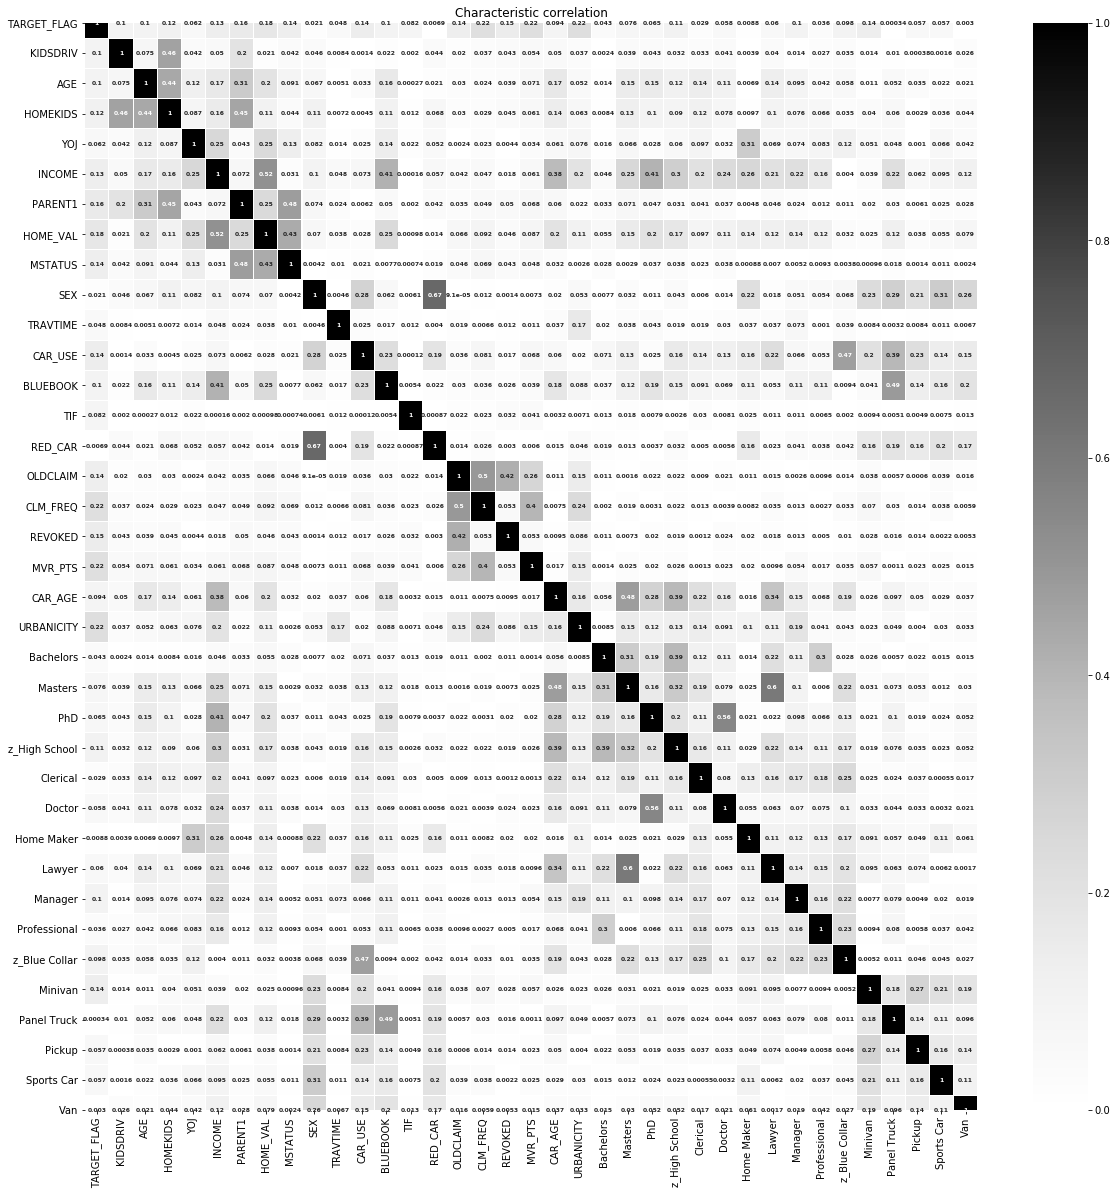

In [17]:
correlations = df.corr() 
correction=abs(correlations)

fig = plt.figure(figsize=(20,20)) 
ax = fig.add_subplot()
ax = sns.heatmap(correction,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})

ax.set_title('Characteristic correlation')

plt.show()

Recall that the variable we are interested in is the TARGET_FLAG, which is located in the first line/column. We can see that some variables are more related to the target variable than others, and some groups of variables have a much larger in-group covariance. This may give us hints if we want to do a selction of the varibales in order to decrease the dimension of the data.

## Train our model

First of all we seperate the target varibale from the rest, and split the data into a training set and a test set.

In [18]:
y = df['TARGET_FLAG']
X = df.loc[:, df.columns != 'TARGET_FLAG']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
X_train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,Home Maker,Lawyer,Manager,Professional,z_Blue Collar,Minivan,Panel Truck,Pickup,Sports Car,Van
6954,0,56.0,0,0.0,0,0,83118,1,0,43,...,1,0,0,0,0,0,0,0,1,0
17,0,34.0,3,13.0,34019,0,91875,1,0,27,...,0,1,0,0,0,0,0,0,0,0
4004,0,36.0,0,7.0,76837,0,250653,0,0,67,...,0,0,0,0,1,0,0,0,1,0
3790,0,41.0,2,16.0,66119,0,239085,1,1,46,...,0,0,0,0,1,1,0,0,0,0
6790,0,42.0,0,10.0,45375,0,0,0,0,36,...,0,0,0,0,1,0,0,0,0,0


Here, we use a simple random forest model to make the predictions.

In [21]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=0)

RF_model = RFC.fit(X_train, y_train)

In [22]:
## a 0-1 prediction of the test data set
y_scores = RF_model.predict(X_test)

To calculate the score, we used the roc_auc_score, which is the area of the part under the roc curve.

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [24]:
y_predict_proba = RF_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc ## the score is about 0.8

0.7964638685662944

We need to remark that to make it simple, I fixed the parameter of this model. To get better performance, we can think about doing a cross validation to chose the best parameter. And, we note that the random forest algorithme suffers from the curse of high-dimensionality, so doing a selection of varaiable before fitting the model may also give us better scores.

Let's see now how our model is going to predict the test data set.

In [25]:
test_input = df_test.drop("INDEX", axis=1)
test_input.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,Home Maker,Lawyer,Manager,Professional,z_Blue Collar,Minivan,Panel Truck,Pickup,Sports Car,Van
0,0,48.0,0,11.0,52881,0,0,0,1,26,...,0,0,1,0,0,0,0,0,0,1
1,1,40.0,1,11.0,50815,1,0,0,1,21,...,0,0,1,0,0,1,0,0,0,0
2,0,44.0,2,12.0,43486,1,0,0,0,30,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,2,12.0,21204,1,0,0,1,74,...,0,0,0,0,0,0,0,1,0,0
4,0,59.0,0,12.0,87460,0,0,0,1,45,...,0,0,1,0,0,1,0,0,0,0


In [26]:
df_test_predict = RF_model.predict(test_input)

In [27]:
df_test_predict.sum()

338

In [28]:
len(df_test_predict)

2141

## Export the predictions

We will need to export our final result into a .csv file.

In [29]:
pred = df_test['INDEX'].copy()

In [30]:
df_test['INDEX']

0           3
1           9
2          10
3          18
4          21
        ...  
2136    10279
2137    10281
2138    10285
2139    10294
2140    10300
Name: INDEX, Length: 2141, dtype: int64

In [31]:
data_pred={"INDEX":df_test['INDEX'],"TARGET_FLAG":df_test_predict}
pred = pd.DataFrame(data_pred)

In [32]:
pred.to_csv("predictions.csv", index = False)